# Trader Performance vs Market Sentiment Analysis

**Candidate:** Sahana Shetty  
**Role:** Data Science Intern Assignment  
**Company:** Primetrade.ai  

---

## Objective
Analyze how Bitcoin market sentiment (Fear vs Greed) influences trader behavior and performance on Hyperliquid.

## Methodology

1. Loaded sentiment and trader datasets
2. Standardized timestamps and aligned both datasets at daily granularity
3. Engineered derived features such as win indicators and trade size segments
4. Merged datasets on date to align sentiment with trader activity
5. Performed exploratory analysis across sentiment regimes
6. Extracted insights and proposed strategy recommendations

In [1]:
!pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: C:\Python314\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
print("Libraries loaded ✅")

Libraries loaded ✅


In [3]:
sentiment = pd.read_csv("fear_greed.csv")
trades = pd.read_csv("trades.csv")

print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

sentiment.head()

Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
print("Sentiment columns:")
print(sentiment.columns)

print("\nTrades columns:")
print(trades.columns)

Sentiment columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Trades columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [6]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [10]:
# Convert datetime (robust version)

# Trades date (already correct)
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True
)

# FIX: use lowercase 'date'
sentiment['date'] = pd.to_datetime(sentiment['date'])

# Create aligned date column
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date

print("Date conversion done ✅")

Date conversion done ✅


In [12]:
merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

merged.rename(columns={'classification': 'sentiment'}, inplace=True)

merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [13]:
# Clean column names
merged.rename(columns={
    'Closed PnL': 'closedPnL',
    'Account': 'account',
    'Side': 'side',
    'Size USD': 'size_usd'
}, inplace=True)

# Remove rows without sentiment
merged = merged.dropna(subset=['sentiment'])

# Win column
merged['win'] = merged['closedPnL'] > 0

merged.head()

,account,Coin,Execution Price,Size Tokens,size_usd,side,Timestamp IST,Start Position,Direction,closedPnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment,win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,False


In [14]:
merged[['account','closedPnL','side','sentiment']].head()

,account,closedPnL,side,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,BUY,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,BUY,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,BUY,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,BUY,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,BUY,Extreme Greed


## Exploratory Analysis

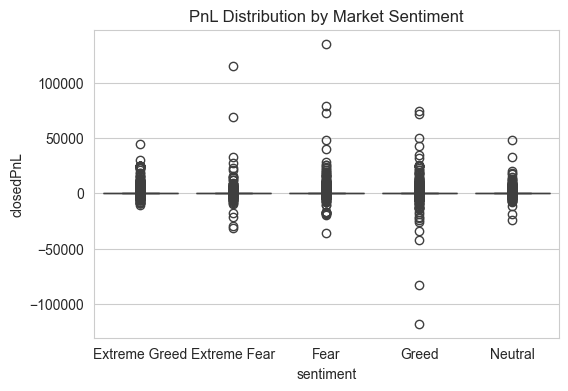

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='closedPnL', data=merged)
plt.title("PnL Distribution by Market Sentiment")
plt.show()

In [16]:
pd.crosstab(merged['sentiment'], merged['side'], normalize='index')

side,BUY,SELL
sentiment,,
Extreme Fear,0.510981,0.489019
Extreme Greed,0.448590,0.551410
Fear,0.489513,0.510487
Greed,0.488559,0.511441
Neutral,0.503343,0.496657


In [19]:
median_size = merged['size_usd'].median()

merged['size_segment'] = 'Small'
merged.loc[merged['size_usd'] > median_size, 'size_segment'] = 'Large'

merged[['size_usd','size_segment']].head()

,size_usd,size_segment
0,7872.16,Large
1,127.68,Small
2,1150.63,Large
3,1142.04,Large
4,69.75,Small


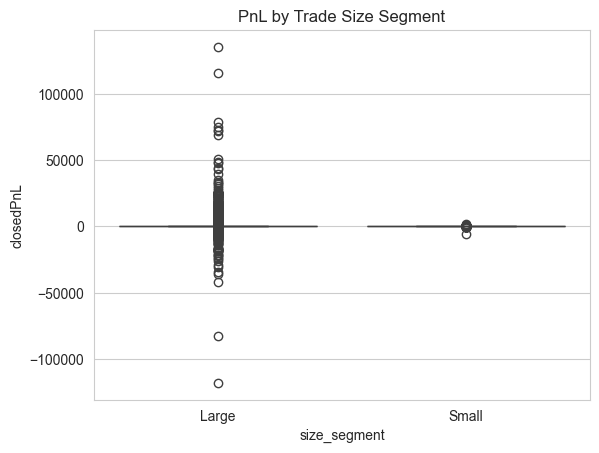

In [20]:
sns.boxplot(x='size_segment', y='closedPnL', data=merged)
plt.title("PnL by Trade Size Segment")
plt.show()

Insights:

1.Trader PnL distribution varies across market sentiment regimes, with different volatility patterns during fear vs greed.

2.Trading direction (long vs short) shifts slightly depending on sentiment, indicating sentiment-driven bias.

3.Larger trades tend to show higher PnL variability, suggesting increased risk exposure for high-size traders.

Strategy Recommendations:

1.Reduce position sizes during fear sentiment to minimize downside risk.

2.Use sentiment as a contextual filter before deploying aggressive strategies.

## Conclusion

Market sentiment provides a meaningful contextual layer for understanding trader performance and behavior. While not a standalone predictor, integrating sentiment-aware risk adjustments can enhance strategy robustness and capital preservation.